# Planetary orbits

In [1]:
import numpy as np
import matplotlib.pylab as plt

G = 4.*(np.pi**2) # gravitational constant in astronomical units

We define the classes ```Body```, ```Star```, and ```Planet``` described in Exercise 1 in the cell below. We also include the methods ```gravitational_force``` and ```compute_orbit_step``` of class ```Planet``` required for Exercise 2 right away.

In [5]:
class Body():
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity

    def update_position(self, dt):
        self.position += self.velocity*dt

    def update_velocity(self, acceleration, dt):
        self.velocity += acceleration*dt

class Star(Body):
    def __init__(self, name, mass, radius, position, velocity):
        super().__init__(position, velocity) # we use the initialization function of the superclass (or the parent class)
                                             # to set position and velocity attributes of the Star class
        self.mass = mass
        self.radius = radius
        self.name = name

    def info(self):
        print("Star info:")
        print(f"  Name: {self.name}")
        print(f"  Mass: {self.mass}")

class Planet(Body):
    def __init__(self, name, mass, radius, position, velocity):
        super().__init__(position, velocity)
        self.mass = mass
        self.radius = radius
        self.name = name

    def info(self):
        print("Planet info:")
        print(f"  Name: {self.name}")
        print(f"  Mass: {self.mass}")
        print(f"  Radius: {self.radius}")

    def gravitational_force(self, star):
        direction = self.position - star.position
        distance = np.linalg.norm(direction)
        return -G*star.mass*self.mass*direction/(distance**3)
    
    def compute_orbit_step(self,star,dt):
        a = self.gravitational_force(star)/self.mass
        self.update_position(dt)
        self.update_velocity(a,dt)

We define an instance of class ```Star``` named ```sun``` (representing the Sun of our Solar System), and an instance of class ```Planet``` named ```earth``` (representing planet Earth) in the next cell.

In [6]:
sun = Star("Sun", 1., 4.7*1e-3, np.array([0.,0.]), np.array([0.,0.]))
earth = Planet("Earth", 3.*1e-6, 4.3*1e-5, np.array([0.,1.]), np.array([0.,0.]))

Finally, we calculate and plot orbits for several choices of the initial velocity of Earth in the following cell.

Text(0, 0.5, 'y')

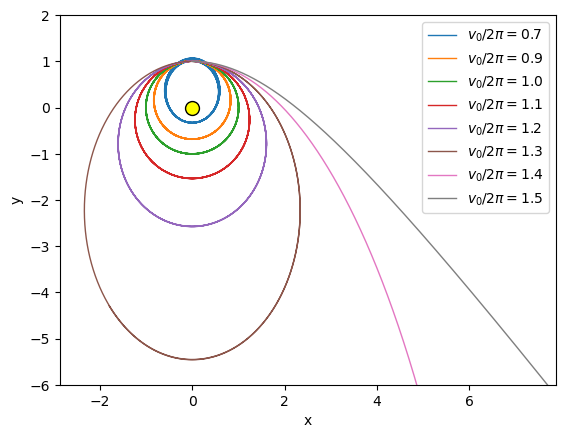

In [7]:
for v0 in [0.7,0.9,1.0,1.1,1.2,1.3,1.4,1.5]:

    earth.position = np.array([0.,1.])
    earth.velocity = np.array([v0*2.*np.pi,0.])

    dt = 1e-5
    trajectory = []

    for step in np.arange(0, 10, dt):
        earth.compute_orbit_step(sun,dt)
        trajectory.append(earth.position.copy())

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:,0],trajectory[:,1], label=f"$v_0/2\pi=${v0}", linewidth=1)

plt.plot([sun.position[0]], [sun.position[1]], marker='o', color='yellow', markeredgecolor='black', markersize=10) 
plt.legend()

plt.axis("equal") # make axis aspect ratios equal (otherwise circular orbits would look elliptic)
plt.xlim([-2,7])
plt.ylim([-6,2])

plt.xlabel('x')
plt.ylabel('y')